In [1]:
import pandas as pd
import requests
import google_streetview.api
import geopandas as gp

import numpy as np
from shapely.geometry import Point, Polygon
from matplotlib import pyplot as plt
import sys

/Users/gpoulsen@apamail.org/Library/Python/3.10/lib/python/site-packages/requests/__init__.py:109: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.1.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn(


In [2]:
def Random_Points_in_Polygon(polygon, number):
    points = []
    minx, miny, maxx, maxy = polygon.bounds
    while len(points) < number:
        pnt = Point(np.random.uniform(minx, maxx), np.random.uniform(miny, maxy))
        if polygon.contains(pnt):
            points.append(pnt)
    return points


def get_image(key, lng, lat, dr):

    lc = str(lat) + "," + str(lng) #Location

    r_mp = {'Georgia': '15000', #Radius for Each State using a rate of .13 meters per square mile
            'Utah': '25000',
            'Idaho': '15000',
            'Maine': '20000'}

    # Define parameters for street view api
    params = [{
    'size': '150x150', # max 640x640 pixels
    'location': lc, #Location
    'radius' : r_mp[dr.split(" ")[0]], #Get Nearest Image within radius miles
    'heading': '0', #Face North
    'pitch': '0', #No Pitch
    'key': key #Submit Key
    }]

    # Create a results object
    results = google_streetview.api.results(params)

    # Download images to directory 'downloads'
    results.download_links(dr)
    return results


https://public.opendatasoft.com/explore/dataset/us-state-boundaries/export/

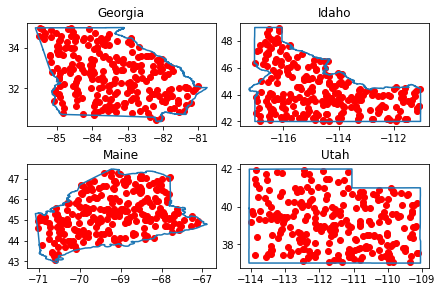

In [3]:

#Load & Clean
sts = gp.read_file('/Users/gpoulsen@apamail.org/Desktop/Grant Training/Geoguesser/us-state-boundaries.geojson')
sts['state'] = sts['state'].astype(int)

sts = sts[['gid','name','state','geometry']]
sts = sts[sts['state'].isin([16,49,13,23])] #Idaho, Utah, Gerogia, Maine

#Get Uniformly Random Coordinates
grps = sts.groupby('state')

ptMp = {}
cnt = 1
for k,v in grps:

    pg = v['geometry'].values[0]
    pts = []

    min_x, min_y, max_x, max_y = pg.bounds
    while(len(pts) <= 1250):

        pnt = Point(np.random.uniform(min_x, max_x), np.random.uniform(min_y, max_y))
        if pg.contains(pnt):
            pts.append(pnt)

    x = np.random.uniform( min_x, max_x, 1)
    y = np.random.uniform( min_y, max_y, 1)

    #Make Plot W/ Samples

    xs = [pt.x for pt in pts]
    ys = [pt.y for pt in pts]
    
    xp,yp = pg.exterior.xy
    plt.subplot(2, 2, cnt)
    plt.gca().title.set_text(v['name'].values[0])
    plt.plot(xp,yp)
    plt.scatter(xs, ys,color="red")

    ptMp[k] = pts
    cnt += 1

plt.tight_layout(pad=.5)
plt.show()

In [4]:

state_mp = {

13: 'Georgia',
23: 'Maine',
16: 'Idaho',
49: 'Utah'

}

for k,v in ptMp.items():

    cnt = 0
    st = state_mp[k]

    for e in v:

        lng = e.x
        lat = e.y  

        dr = st + " " + str(cnt)

        res = get_image(ky,lng,lat,dr)

        if(res.metadata[0]['status'] != 'OK'):
            
            print((lng,lat))
            print(dr)

        cnt += 1

(-112.71755118206833, 44.27847194362223)
Idaho 1008
(-116.52976844626033, 42.391052638935854)
Idaho 1020
(-115.4184864088439, 42.28223652991959)
Idaho 1025
(-113.55895177543795, 43.04437536013441)
Idaho 1042
(-115.26696928993589, 42.25812406331529)
Idaho 1045
(-114.34209026626841, 42.00273174924128)
Idaho 1050
(-115.24391438950673, 45.24553299233702)
Idaho 1090
(-116.82480489229533, 42.42961338021371)
Idaho 1092
(-115.27303171384881, 42.55599095385143)
Idaho 1102
(-116.285687850814, 42.55314472185126)
Idaho 1104
(-115.16780243690937, 45.35782962416178)
Idaho 1129
(-116.84614882674452, 42.03158024656588)
Idaho 1136
(-115.17434140278874, 45.308061977993326)
Idaho 1181
(-115.30912871759732, 46.99879077081794)
Idaho 1230
(-112.79752216538152, 44.30340091293172)
Idaho 1231
(-116.47229767134044, 42.12402408987426)
Idaho 1247
(-69.89621915900446, 46.388643818058206)
Maine 1017
(-68.91361911177773, 46.734951462767384)
Maine 1092
(-68.84335288262722, 46.81217964245261)
Maine 1204
(-68.879195550